# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [175]:
df = pd.read_csv('./dados/heart_disease_uci.csv').drop(['id', 'dataset'], axis='columns')
df['flag_doente'] = (df['num']!=0).astype('int64')
df.dropna(axis='index', subset=['trestbps'], inplace=True)
#df.head()
df.isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol            27
fbs             89
restecg          2
thalch           0
exang            0
oldpeak          7
slope          253
ca             552
thal           431
num              0
flag_doente      0
dtype: int64

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          861 non-null    int64  
 1   sex          861 non-null    object 
 2   cp           861 non-null    object 
 3   trestbps     861 non-null    float64
 4   chol         834 non-null    float64
 5   fbs          772 non-null    object 
 6   restecg      859 non-null    object 
 7   thalch       861 non-null    float64
 8   exang        861 non-null    object 
 9   oldpeak      854 non-null    float64
 10  slope        608 non-null    object 
 11  ca           309 non-null    float64
 12  thal         430 non-null    object 
 13  num          861 non-null    int64  
 14  flag_doente  861 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [177]:
def analise_bivariada(df, nome_x, nome_y):
    tab = pd.crosstab(df[nome_x], df[nome_y], margins=True)
    tab['prob_doente'] = tab[1]/tab['All']
    tab['chance_doente'] = tab[1]/tab[0]
    tab['razao_chance'] = tab['chance_doente']/tab['chance_doente']['All']
    tab['logito'] = np.log(tab['chance_doente'])
    tab['woe'] = np.log(tab['razao_chance'])
    return tab

In [178]:
analise_bivariada(df, 'cp', 'flag_doente')

flag_doente,0,1,All,prob_doente,chance_doente,razao_chance,logito,woe
cp,,,,,,,,
asymptomatic,99,368,467,0.788009,3.717172,3.092371,1.312963,1.128938
atypical angina,144,23,167,0.137725,0.159722,0.132875,-1.834319,-2.018344
non-anginal,125,60,185,0.324324,0.480000,0.399319,-0.733969,-0.917994
typical angina,23,19,42,0.452381,0.826087,0.687234,-0.191055,-0.375080
All,391,470,861,0.545877,1.202046,1.000000,0.184025,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [179]:
analise_bivariada(df, 'fbs', 'flag_doente')

flag_doente,0,1,All,prob_doente,chance_doente,razao_chance,logito,woe
fbs,,,,,,,,
False,337,319,656,0.486280,0.946588,0.903452,-0.054892,-0.101532
True,40,76,116,0.655172,1.900000,1.813418,0.641854,0.595213
All,377,395,772,0.511658,1.047745,1.000000,0.046641,0.000000


In [180]:
analise_bivariada(df, 'sex', 'flag_doente')

flag_doente,0,1,All,prob_doente,chance_doente,razao_chance,logito,woe
sex,,,,,,,,
Female,142,50,192,0.260417,0.352113,0.292928,-1.043804,-1.227829
Male,249,420,669,0.627803,1.686747,1.403230,0.522802,0.338777
All,391,470,861,0.545877,1.202046,1.000000,0.184025,0.000000


Pacientes sem dor no peito têm uma chance bem mais alta de estarem doentes que o restante, indicando que a variável $cp$ é uma boa preditora de pacientes doentes neste dataset.

3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [181]:
modelo = smf.logit('flag_doente ~ sex + cp + trestbps', data=df).fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.493475
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  861
Model:                          Logit   Df Residuals:                      855
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.2837
Time:                        17:09:23   Log-Likelihood:                -424.88
converged:                       True   LL-Null:                       -593.17
Covariance Type:            nonrobust   LLR p-value:                 1.358e-70
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.5096      0.634     -2.381      0.017      -2.752      -0.267
sex[T.Male]               1.4783      0.215      6.879      0.000       1.057       1.900
cp[T.atypical angina]    -3.0846      0.259    -11.908      0.000      -3.592      -2.577
cp[T.non-anginal]        -1.9990      0.202     -9.879      0.000      -2.396      -1.602
cp[T.typical angina]     -1.5319      0.345     -4.438      0.000      -2.208      -0.855
trestbps                  0.0124      0.004      2.759      0.006       0.004       0.021
=========================================================================================
"""

As três variáveis parecem estatisticamente significantes.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [182]:
df['predito'] = modelo.predict(df)
qualid = pd.DataFrame()
cat_prob = pd.qcut(df['predito'], 5)
aggr_prob = df.groupby(cat_prob)
qualid['predito'] = aggr_prob['predito'].mean()
qualid['real'] = aggr_prob['flag_doente'].mean()
qualid


,predito,real
predito,,
"(0.0327, 0.182]",0.117938,0.108696
"(0.182, 0.457]",0.347140,0.348837
"(0.457, 0.791]",0.621692,0.639752
"(0.791, 0.838]",0.818890,0.835165
"(0.838, 0.92]",0.860870,0.833333


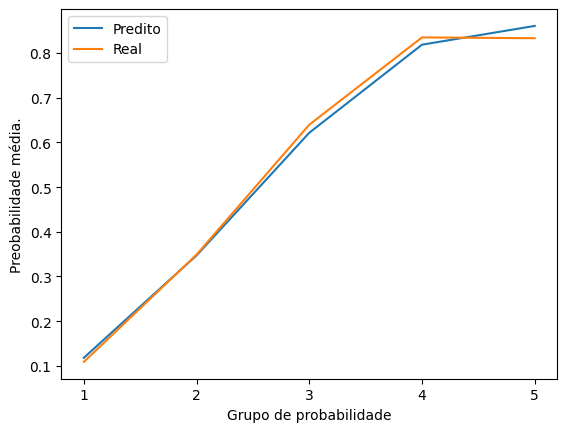

In [183]:
fig, ax = plt.subplots()
cat_index = np.array([1, 2, 3, 4, 5])
ax.set_xlabel('Grupo de probabilidade')
ax.set_ylabel('Preobabilidade média.')
ax.plot(cat_index, qualid.predito, label='Predito')
ax.plot(cat_index, qualid.real, label='Real')
ax.set_xticks(cat_index)
ax.legend()

O modelo parece bastante calibrado

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [184]:
from sklearn import metrics
from scipy.stats import ks_2samp

In [185]:
acuracia = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print(f'Acurácia: {acuracia * 100}%')

Acurácia: 77.5842044134727%


In [186]:
ks = ks_2samp(
    df.loc[df['flag_doente'] == 1, 'predito'],
    df.loc[df['flag_doente'] == 0, 'predito']
).statistic
print(f'KS: {ks}')

KS: 0.5545192360015236


In [187]:
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
gini = 2*auc_- 1
print(f'Gini: {gini}')

Gini: 0.65838820264461


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [188]:
df.dropna(axis='index', subset=['fbs', 'chol', 'oldpeak', 'restecg'], inplace=True)
df.isna().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalch           0
exang            0
oldpeak          0
slope          209
ca             437
thal           340
num              0
flag_doente      0
predito          0
dtype: int64

In [189]:
modelo = smf.logit('flag_doente ~ sex + cp + fbs + thalch + exang + oldpeak', data=df).fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.426388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  740
Model:                          Logit   Df Residuals:                      731
Method:                           MLE   Df Model:                            8
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                  0.3843
Time:                        17:09:23   Log-Likelihood:                -315.53
converged:                       True   LL-Null:                       -512.47
Covariance Type:            nonrobust   LLR p-value:                 3.797e-80
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.1936      0.643      1.856      0.063      -0.067       2.454
sex[T.Male]               1.2979      0.248      5.227      0.000       0.811       1.785
cp[T.atypical angina]    -1.9005      0.295     -6.446      0.000      -2.478      -1.323
cp[T.non-anginal]        -1.3816      0.245     -5.629      0.000      -1.863      -0.901
cp[T.typical angina]     -1.2679      0.433     -2.928      0.003      -2.117      -0.419
fbs[T.True]               0.6603      0.283      2.334      0.020       0.106       1.215
exang[T.True]             1.0450      0.227      4.606      0.000       0.600       1.490
thalch                   -0.0173      0.004     -4.148      0.000      -0.025      -0.009
oldpeak                   0.6547      0.112      5.852      0.000       0.435       0.874
=========================================================================================
"""

In [190]:
df['predito'] = modelo.predict(df)
qualid = pd.DataFrame()
cat_prob = pd.qcut(df['predito'], 5)
aggr_prob = df.groupby(cat_prob)
qualid['predito'] = aggr_prob['predito'].mean()
qualid['real'] = aggr_prob['flag_doente'].mean()
qualid

,predito,real
predito,,
"(0.0172, 0.13]",0.074659,0.060811
"(0.13, 0.376]",0.228367,0.236486
"(0.376, 0.681]",0.528397,0.540541
"(0.681, 0.902]",0.810319,0.810811
"(0.902, 0.995]",0.946095,0.939189


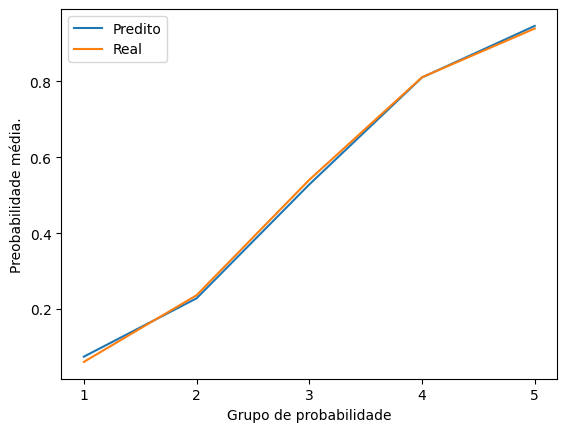

In [191]:
fig, ax = plt.subplots()
cat_index = np.array([1, 2, 3, 4, 5])
ax.set_xlabel('Grupo de probabilidade')
ax.set_ylabel('Preobabilidade média.')
ax.plot(cat_index, qualid.predito, label='Predito')
ax.plot(cat_index, qualid.real, label='Real')
ax.set_xticks(cat_index)
ax.legend()

In [192]:
ks = ks_2samp(
    df.loc[df['flag_doente'] == 1, 'predito'],
    df.loc[df['flag_doente'] == 0, 'predito']
).statistic
print(f'KS: {ks}')

KS: 0.6173508567918029


In [193]:
acuracia = metrics.accuracy_score(df['flag_doente'], df['predito'] > .5)
print(f'Acurácia: {acuracia * 100}%')

Acurácia: 79.32432432432432%
